# Media Company Case Study

Problem Statement:
    
    A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

## Step 1 : Reading and Data Understanding

In [23]:
# Warning import
import warnings
warnings.filterwarnings('ignore')
#import libraries
import numpy as np 
import pandas as pd

#Data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Librraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#date time libraries
from datetime import date

In [24]:
#Reading the data set
Media_df = pd.read_csv("Media.csv")

In [25]:
# Check the head of the dataset
Media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


Inspect the various aspects of the housing dataframe

In [26]:
Media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [27]:
Media_df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


Missing Values

In [28]:
Media_df.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
dtype: int64

In [29]:
#As per above obsevation we can drop the unnamed column as it contains Null values

In [30]:
Media_df = Media_df.drop('Unnamed: 7', axis = 1)

In [31]:
Media_df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

## Step 2: Visualising the Data

In [32]:
Media_df['Date'] = pd.to_datetime(Media_df['Date'])

In [33]:
# Deriving "days since the show started"
from datetime import datetime
date_to_sub = datetime(2017, 2, 28)
date_to_sub = datetime.combine(date_to_sub, datetime.min.time())
Media_df['day']= Media_df.Date - date_to_sub

In [34]:
Media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [35]:
# Cleaning days
Media_df['day'] = Media_df['day'].astype(str)
Media_df['day'] = Media_df['day'].map(lambda x: x[0:2])
Media_df['day'] = Media_df['day'].astype(int)

<Axes: xlabel='day'>

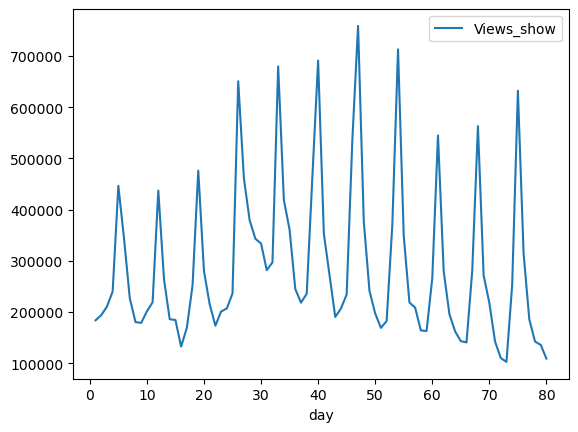

In [36]:
Media_df.plot.line(x = 'day', y = 'Views_show')

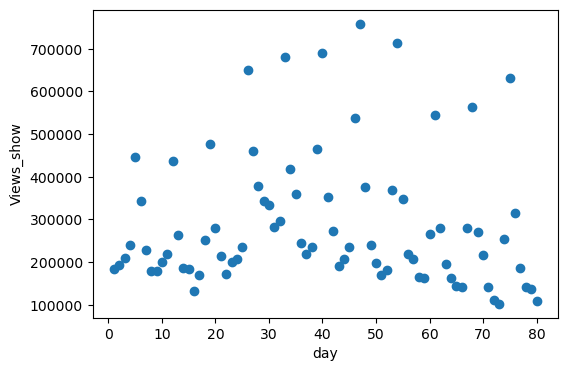

In [45]:
#scatter plot 
plt.figure(figsize=(6,4))
plt.scatter(x= Media_df.day, y=Media_df.Views_show, cmap= "rgb")
plt.xlabel('day')
plt.ylabel('Views_show')
plt.show()

In [46]:
Media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [47]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
Media_df['weekday'] = (Media_df['day']+3)%7
Media_df.weekday.replace(0,7, inplace=True)
Media_df['weekday'] = Media_df['weekday'].astype(int)
Media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [48]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

Media_df['weekend']=[cond(i) for i in Media_df['day']]
Media_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


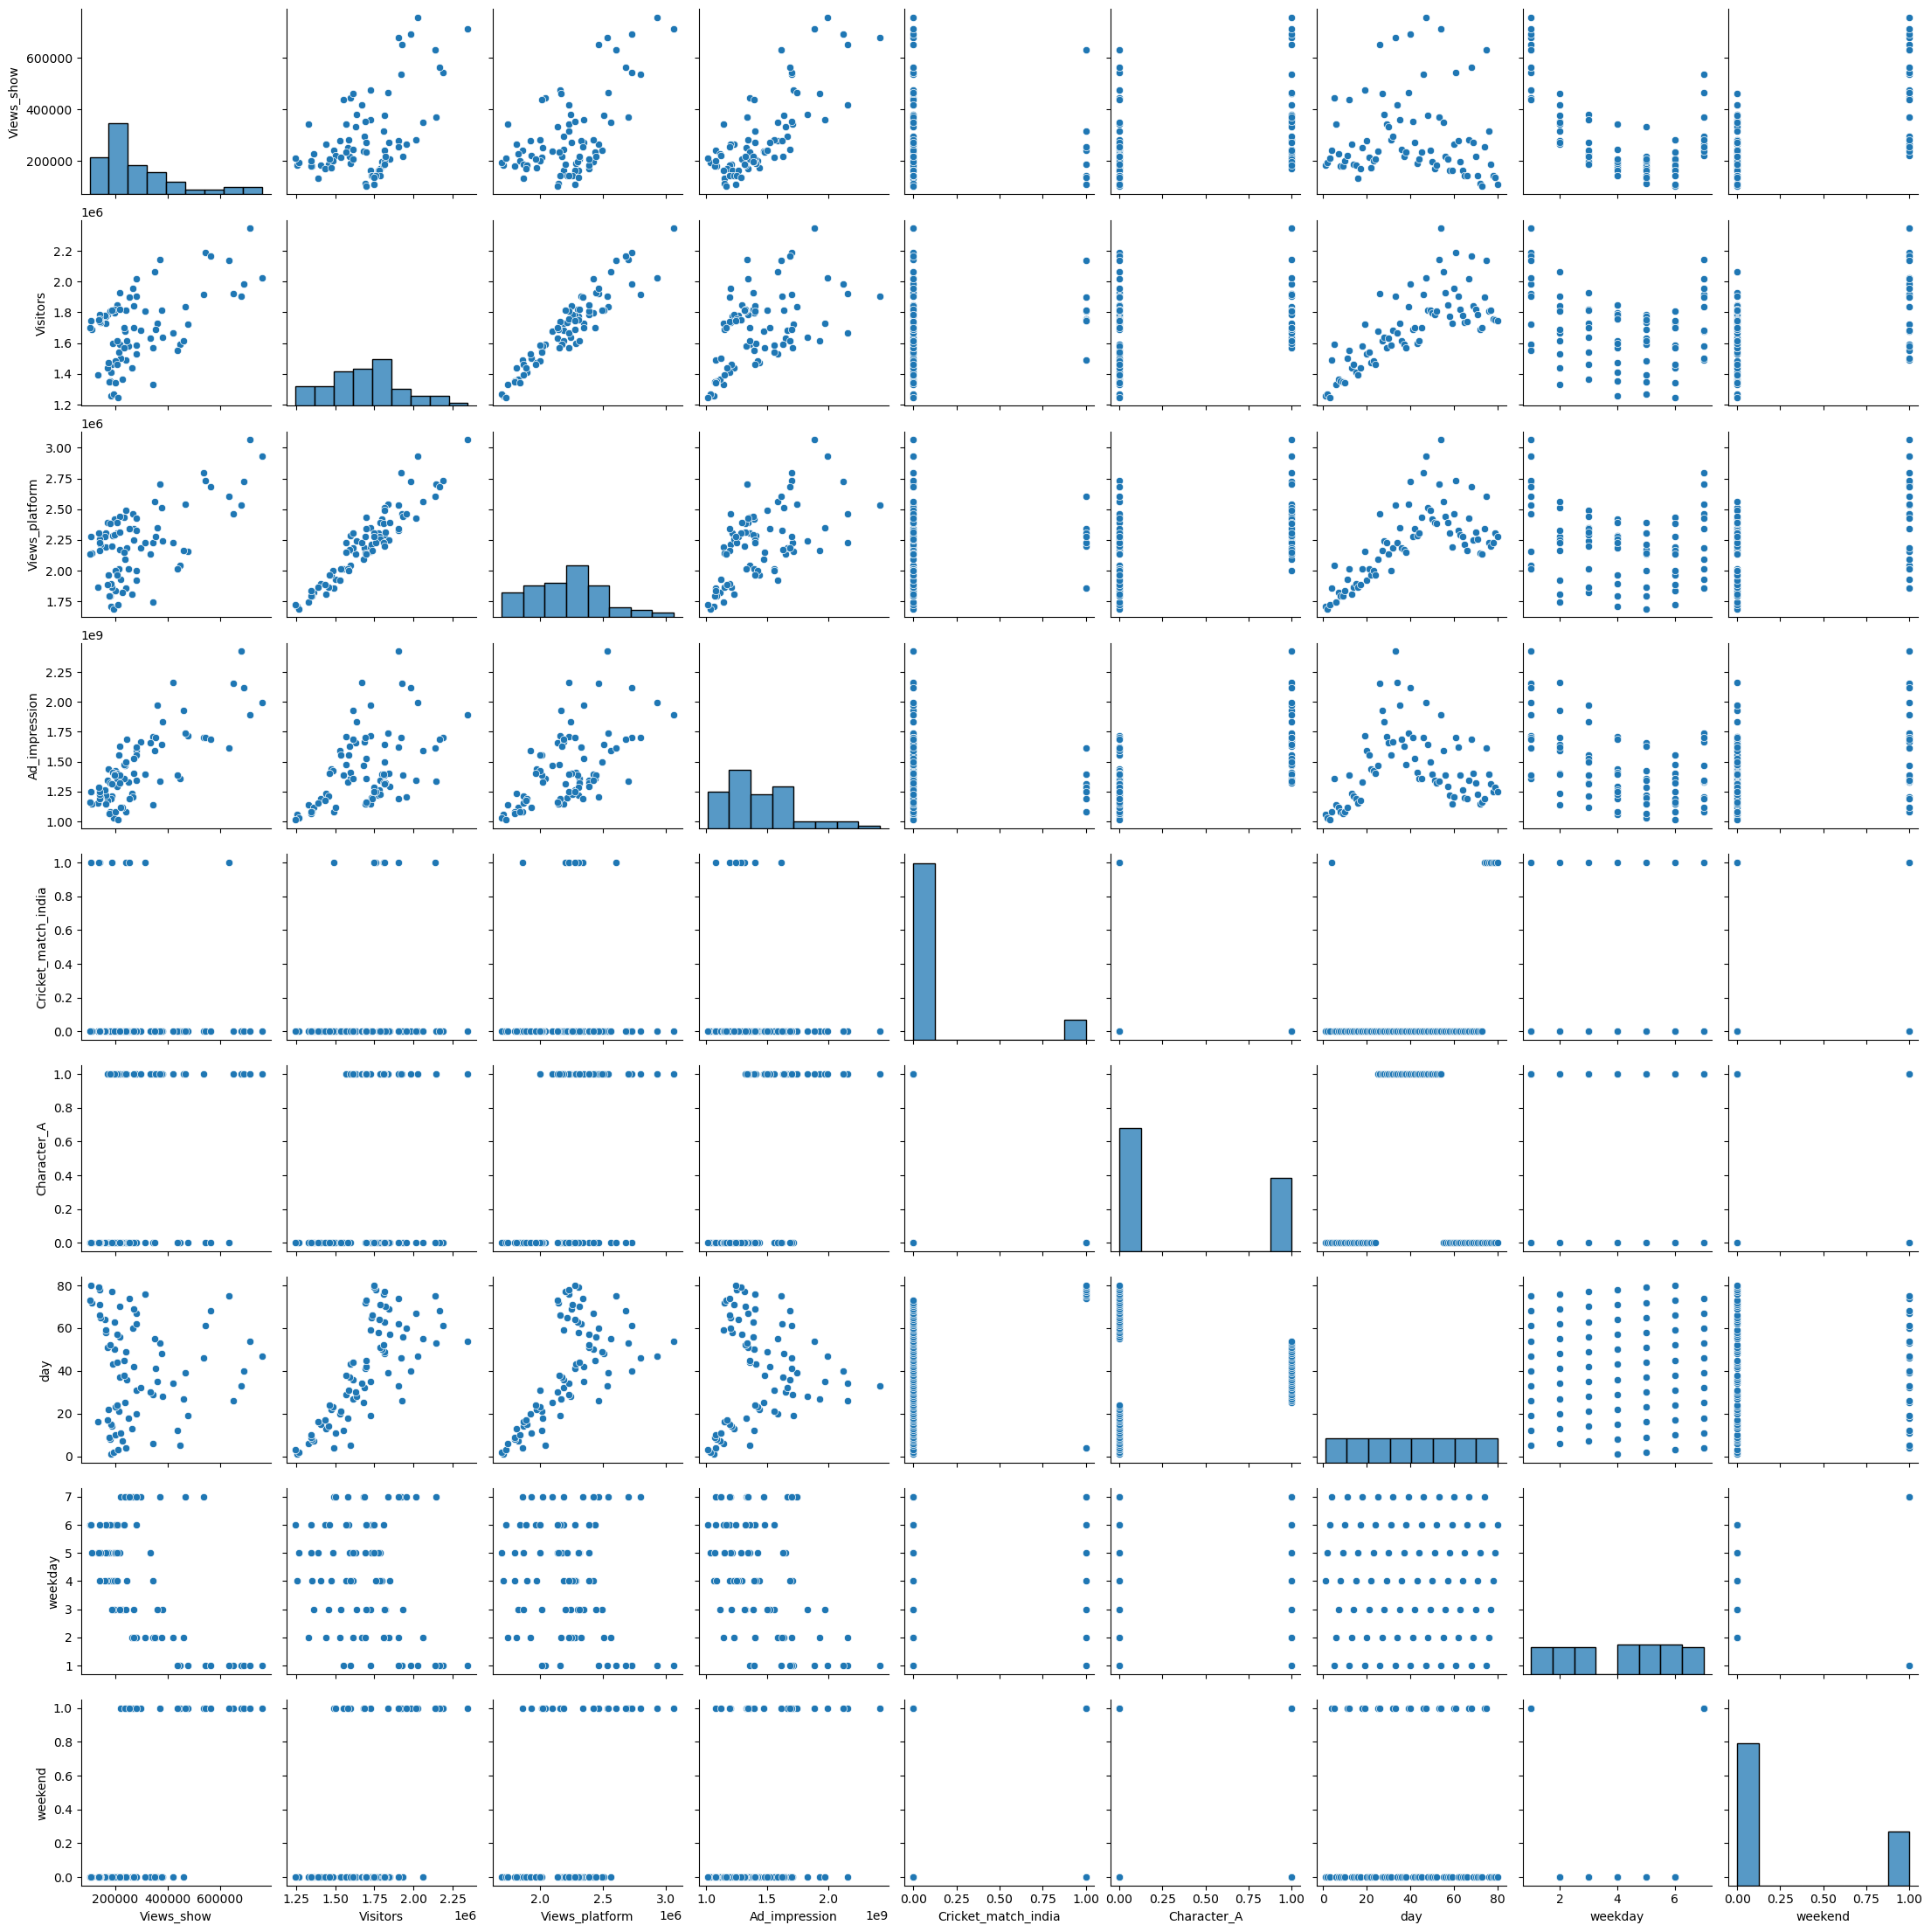

In [49]:
sns.pairplot(Media_df)
plt.show()

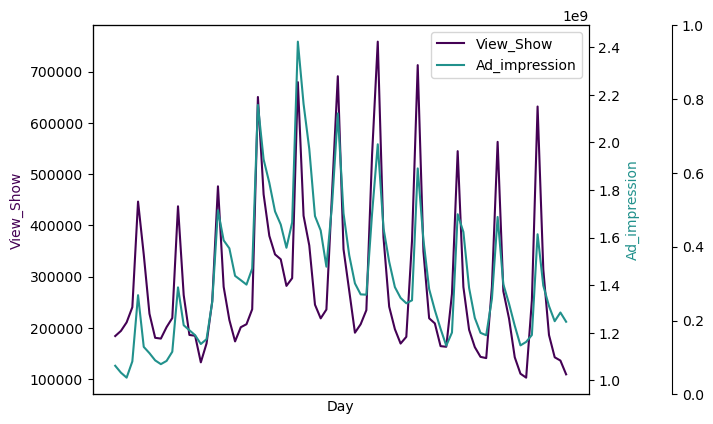

In [50]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(Media_df.day,Media_df.Views_show, color=color1,label="View_Show")
p2, = par1.plot(Media_df.day,Media_df.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [52]:
# Cleaning days
Media_df['day'] = Media_df['day'].astype(str)
Media_df['day'] = Media_df['day'].map(lambda x: x[0:1])
Media_df['day'] = Media_df['day'].astype(int)

## Building a Model 

#### Running first model (lm1) Weekday & visitors

In [53]:
Media_df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day', 'weekday', 'weekend'],
      dtype='object')

In [56]:
# Putting feature variable to X
X = Media_df[['weekday','Visitors']]

# Putting response variable to y
y = Media_df['Views_show']

In [61]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X,y)

LinearRegression()

In [62]:
X = sm.add_constant(X)

lm_model = sm.OLS(y,X).fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           8.01e-12
Time:                        20:22:16   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running second model (lm2) visitors & weekend

In [64]:
# Putting feature variable to X
X = Media_df[['Visitors','weekend']]

# Putting response variable to y
y = Media_df['Views_show']

In [65]:
X = sm.add_constant(X)

lm2_model = sm.OLS(y,X).fit()

lm2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.51e-12
Time:                        20:25:12   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running third model (lm3) visitors, weekend & Character_A 

In [66]:
# Putting feature variable to X
X = Media_df[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = Media_df['Views_show']

In [67]:
X = sm.add_constant(X)

lm3_model = sm.OLS(y,X).fit()

lm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.53e-14
Time:                        20:29:54   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Create lag variable
Media_df['Lag_Views'] = np.roll(Media_df['Views_show'], 1)
Media_df.Lag_Views.replace(108961,0, inplace=True)

In [69]:
Media_df.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [70]:
# Putting feature variable to X
X = Media_df[['Visitors','weekend','Character_A','Lag_Views']]

# Putting response variable to y
y = Media_df['Views_show']

In [72]:
X = sm.add_constant(X)

lm4_model = sm.OLS(y,X).fit()

lm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.16e-21
Time:                        20:32:00   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_Views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

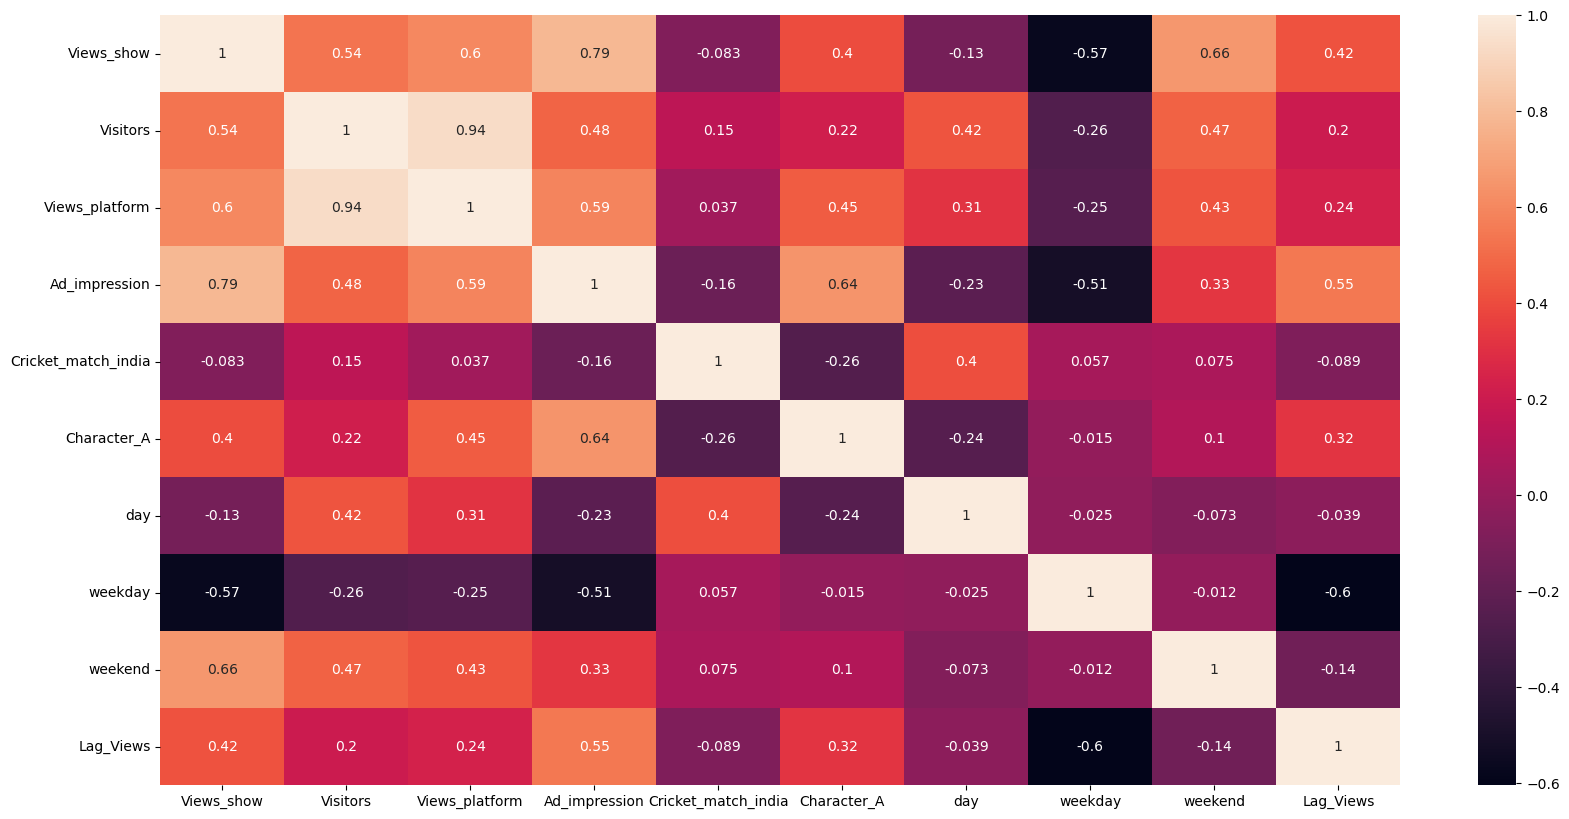

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(Media_df.corr(), annot = True)
plt.show()

#### Running fifth model (lm5) Character_A, weekend & Views_platform 

In [75]:
# Putting feature variable to X
X = Media_df[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = Media_df['Views_show']

In [76]:
X = sm.add_constant(X)

lm5_model = sm.OLS(y,X).fit()

lm5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.59e-15
Time:                        20:41:34   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running sixth model (lm6) Character_A, weekend & Visitors 

In [77]:
# Putting feature variable to X
X = Media_df[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = Media_df['Views_show']

In [78]:
X = sm.add_constant(X)

lm6_model = sm.OLS(y,X).fit()

lm6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.53e-14
Time:                        20:59:38   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [84]:
# Putting feature variable to X
X = Media_df[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = Media_df['Views_show']

In [85]:
X = sm.add_constant(X)

lm7_model = sm.OLS(y,X).fit()

lm7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.10e-25
Time:                        21:05:15   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [86]:
# Putting feature variable to X
X = Media_df[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = Media_df['Views_show']

In [87]:
X = sm.add_constant(X)

lm8_model = sm.OLS(y,X).fit()

lm8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.05e-26
Time:                        21:05:25   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
Media_df['ad_impression_million'] = Media_df['Ad_impression']/1000000

#### Running  model (lm9) weekend, ad_impressions_million

In [101]:
# Putting feature variable to X
X = Media_df[['weekend','ad_impression_million']]

# Putting response variable to y
y = Media_df['Views_show']

In [102]:
X = sm.add_constant(X)

lm9_model = sm.OLS(y,X).fit()

lm9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.95e-27
Time:                        21:14:25   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+05   4.01e+04     -5.744      0.000    -3.1e+05    -1.5e+05
weekend                1.551e+05   1.87e+04      8.282      0.000    1.18e+05    1.92e+05
ad_impression_million   330.9993     28.203     11.736      0.000     274.840     387.159
==============================================================================
Omnibus:                        4.941   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.423
Skew:                           0.399   Prob(JB):                        0.110
Kurtosis:                       3.831   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Making predictions using lm9

In [106]:
# Putting feature variable to X
X = Media_df[['weekend','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm9_model.predict(X)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Media_df.Views_show, Predicted_views)
r_squared = r2_score(Media_df.Views_show, Predicted_views)

In [108]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4797239258.824437
r_square_value : 0.7975978797926214


Text(0, 0.5, 'Views')

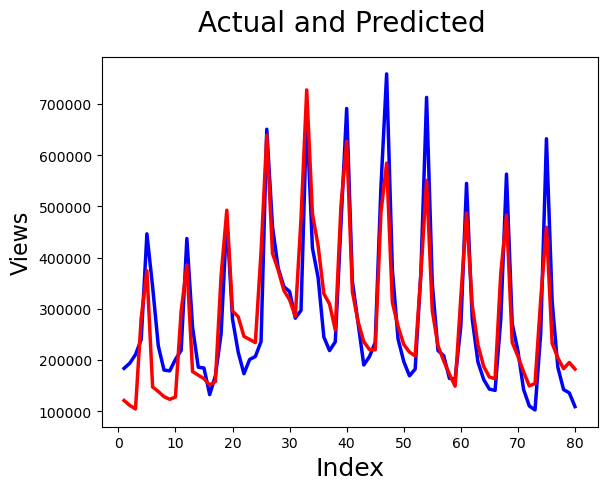

In [110]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Media_df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

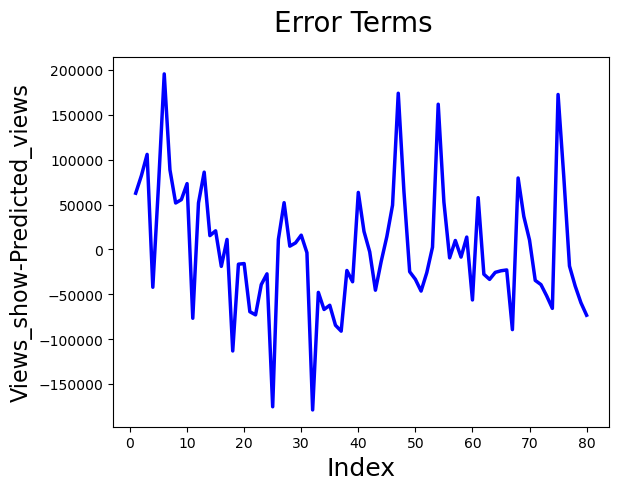

In [111]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Media_df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

#### Making predictions using lm6

In [112]:
# Putting feature variable to X
X = Media_df[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm6_model.predict(X)

In [113]:
mse = mean_squared_error(Media_df.Views_show, Predicted_views)
r_squared = r2_score(Media_df.Views_show, Predicted_views)

In [114]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 292049834294.46893
r_square_value : -11.321984057534658


Text(0, 0.5, 'Views')

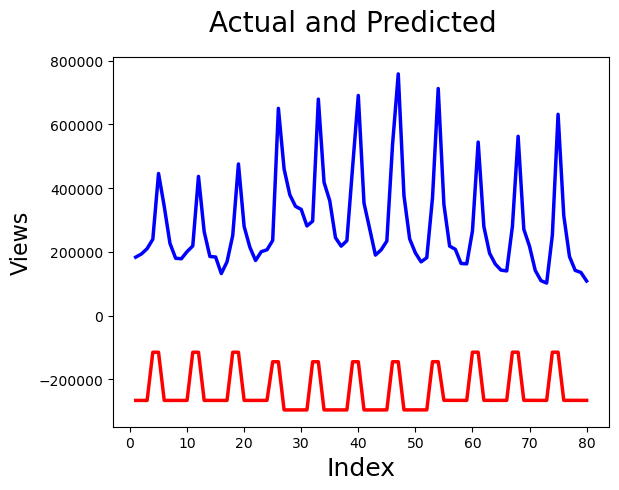

In [115]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Media_df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

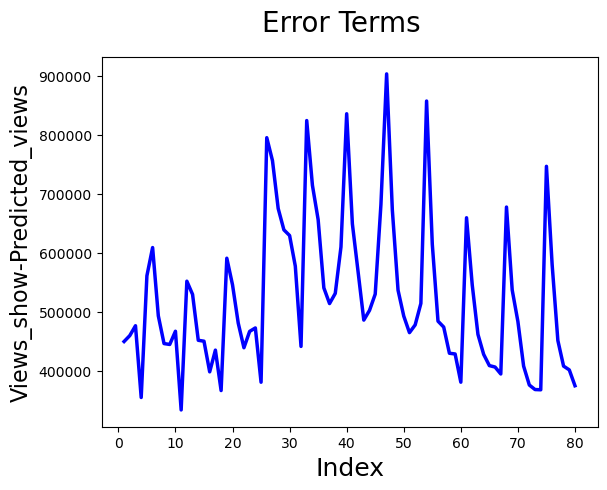

In [116]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Media_df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label